In [1]:
#import the libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from ipywidgets import widgets

2026-02-18 17:55:59.992794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771437360.222337      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771437360.285360      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771437360.835793      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771437360.835848      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771437360.835851      24 computation_placer.cc:177] computation placer alr

In [2]:
#organize the following paths
BASE_DIR = "/kaggle/input/datasets/lordtesla77/dogs-and-cat-filtered/Files/cats_and_dogs_filtered"

train_dir = os.path.join(BASE_DIR,'train')
validation_dir = os.path.join(BASE_DIR,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

print(f"Contents of base directory :{os.listdir(BASE_DIR)}")

print(f"Contents of the train directory: {os.listdir(train_dir)}")

print(f"Contents of the validation directory: {os.listdir(validation_dir)}")

Contents of base directory :['validation', 'vectorize.py', 'train']
Contents of the train directory: ['dogs', 'cats']
Contents of the validation directory: ['dogs', 'cats']


In [3]:
print(f'total training cat images: {len(os.listdir(train_cats_dir))}')
print(f'total training dog images: {len(os.listdir(train_dogs_dir))}')

print(f'total validation cat images: {len(os.listdir(validation_cats_dir))}')
print(f'total validation dog images: {len(os.listdir(validation_dogs_dir))}')

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [4]:
# BUILDING A SMALL MODEL

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    tf.keras.layers.Rescaling(1./255.),
    # Convolutions Layers
    tf.keras.layers.Conv2D(16,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatten the result into feed to DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

I0000 00:00:1771437377.550662      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1771437377.556912      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# model compile
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss ="binary_crossentropy",
    metrics =["accuracy"]
)


In [7]:
# Data Preprocessing

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150,150),
    batch_size=20,
    label_mode ="binary"
)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150,150),
    batch_size=20,
    label_mode ="binary"
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [8]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = train_dataset.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)
validation_dataset_final = validation_dataset.cache().prefetch(PREFETCH_BUFFER_SIZE)

In [9]:
#Training

history = model.fit(
    train_dataset_final,
    epochs = 15,
    validation_data = validation_dataset_final,
    verbose = 2
)

Epoch 1/15


I0000 00:00:1771437389.253726      70 service.cc:152] XLA service 0x7be67401fed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771437389.253771      70 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1771437389.253775      70 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1771437389.601977      70 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-02-18 17:56:31.285776: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-18 17:56:31.424263: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
I0000 00:00:1771437393.082642      70 device_co

100/100 - 11s - 108ms/step - accuracy: 0.5380 - loss: 0.8277 - val_accuracy: 0.5780 - val_loss: 0.6790
Epoch 2/15
100/100 - 1s - 11ms/step - accuracy: 0.6125 - loss: 0.6758 - val_accuracy: 0.5580 - val_loss: 0.7047
Epoch 3/15
100/100 - 1s - 11ms/step - accuracy: 0.6705 - loss: 0.6097 - val_accuracy: 0.7060 - val_loss: 0.5856
Epoch 4/15
100/100 - 1s - 11ms/step - accuracy: 0.7260 - loss: 0.5531 - val_accuracy: 0.6810 - val_loss: 0.6027
Epoch 5/15
100/100 - 1s - 11ms/step - accuracy: 0.7570 - loss: 0.5030 - val_accuracy: 0.7180 - val_loss: 0.5487
Epoch 6/15
100/100 - 1s - 11ms/step - accuracy: 0.7980 - loss: 0.4376 - val_accuracy: 0.7210 - val_loss: 0.5523
Epoch 7/15
100/100 - 1s - 11ms/step - accuracy: 0.8145 - loss: 0.3898 - val_accuracy: 0.7230 - val_loss: 0.5573
Epoch 8/15
100/100 - 1s - 11ms/step - accuracy: 0.8715 - loss: 0.3050 - val_accuracy: 0.7310 - val_loss: 0.6035
Epoch 9/15
100/100 - 1s - 11ms/step - accuracy: 0.9015 - loss: 0.2349 - val_accuracy: 0.7310 - val_loss: 0.7139
E

In [10]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a dog")
        else:
            print(filename + " is a cat")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)


uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()

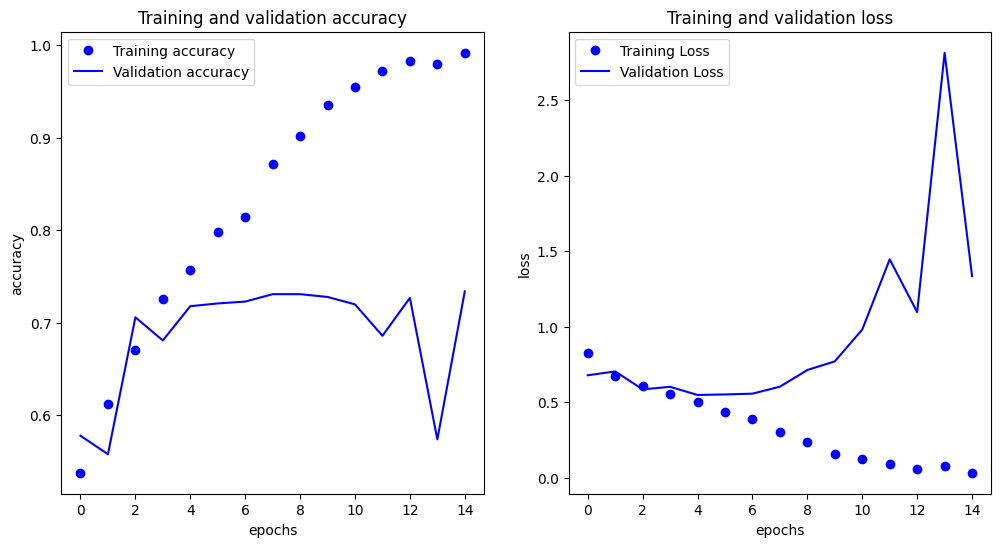

In [11]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()
    
    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    
    plt.show()

plot_loss_acc(history)